In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../mvTCR/')
import tcr_embedding as tcr

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', None)

/home/icb/felix.drost/miniconda3/envs/mvTCR/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata_raw = sc.read('../mvTCR/data/Haniffa/haniffa21.processed.h5ad')

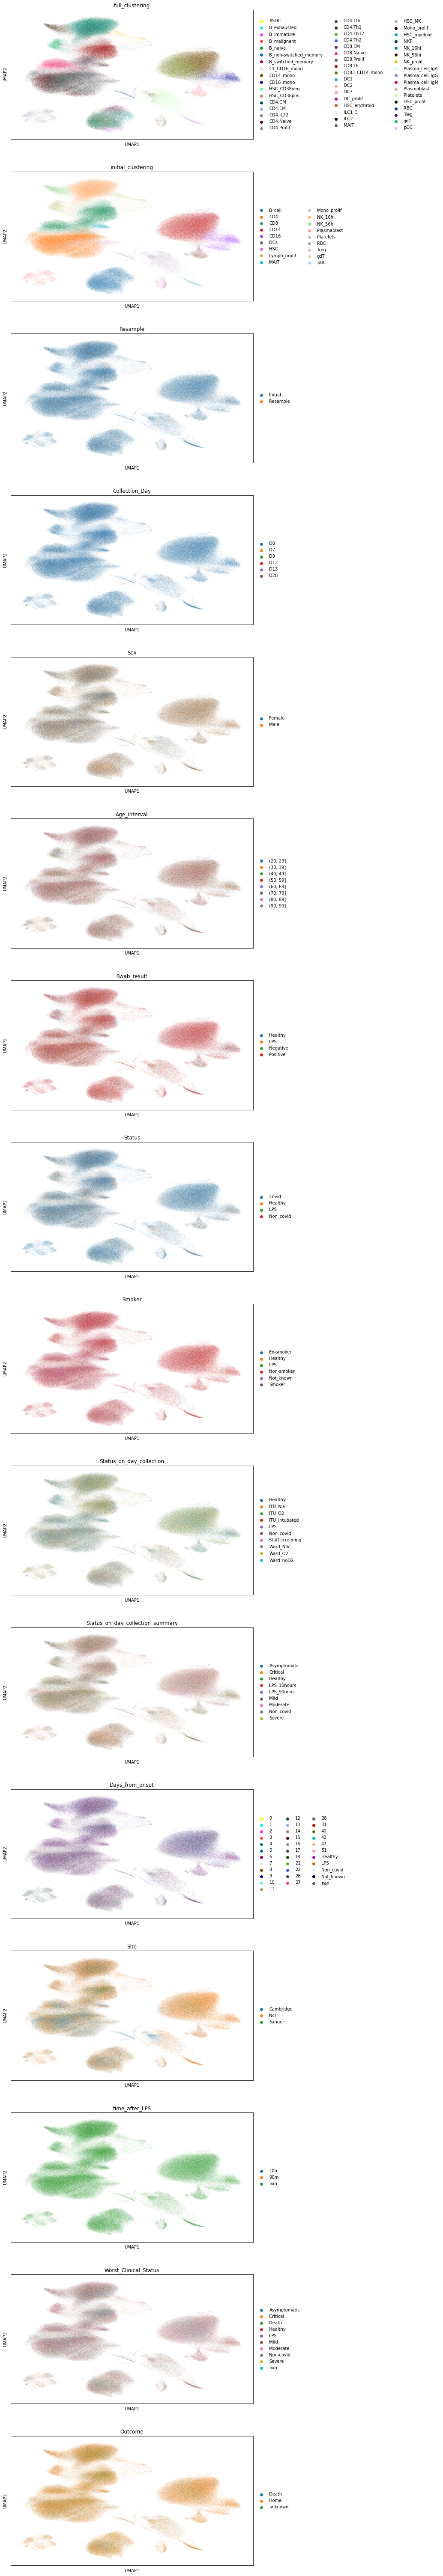

In [3]:
sc.pl.umap(adata_raw, color=['full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 
                             'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary',
                             'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome'], ncols=1)

## Load TCR data

In [4]:
alpha_chain = pd.read_csv('../mvTCR/data/Haniffa/TCR_alpha_CDR3.txt', delimiter='\t')
alpha_chain.set_index('CellID', inplace=True)
alpha_chain

,v_gene,d_gene,j_gene,c_gene,umis,cdr3,cdr3_nt,Sub.Annotation
CellID,,,,,,,,
AAACCTGAGAAACCTA-MH9179824,TRAV8-4,None,TRAJ31,TRAC,4,CAVSVVRNNNARLMF,TGTGCTGTGAGTGTCGTCCGGAATAACAATGCCAGACTCATGTTT,CD8.TE
AAACCTGAGAACTCGG-MH8919329,TRAV34,None,TRAJ30,TRAC,5,CGADNRDDKIIF,TGTGGAGCAGACAACAGAGATGACAAGATCATCTTT,CD4.Naive
AAACCTGAGAAGGACA-MH9143274,TRAV8-1,None,TRAJ22,TRAC,4,CAVNARGSARQLTF,TGTGCCGTGAATGCGAGGGGTTCTGCAAGGCAACTGACCTTT,CD4.Naive
AAACCTGAGAAGGTTT-MH9143370,TRAV14/DV4,None,TRAJ9,TRAC,16,CAMREGYTGGFKTIF,TGTGCAATGAGAGAGGGATATACTGGAGGCTTCAAAACTATCTTT,CD8.EM
AAACCTGAGACGCACA-MH9143420,TRAV12-3,None,TRAJ11,TRAC,8,CAMRKSGYSTLTF,TGTGCAATGAGAAAGTCAGGATACAGCACCCTCACCTTT,CD4.Naive
...,...,...,...,...,...,...,...,...
TTTGTCATCTGGTATG-MH9143423,TRAV19,None,TRAJ52,TRAC,5,CALSGAGGTSYGKLTF,TGTGCTCTGAGTGGGGCTGGTGGTACTAGCTATGGAAAGCTGACATTT,CD8.TE
TTTGTCATCTGTTTGT-MH9143422,TRAV14/DV4,None,TRAJ35,TRAC,3,CAIILGCFGNVLHC,TGTGCAATTATACTCGGGTGCTTTGGGAATGTGCTGCATTGC,CD8.EM
TTTGTCATCTGTTTGT-MH9143422,TRAV21,None,TRAJ29,TRAC,11,CAVVSTRINTPLVF,TGTGCTGTGGTTTCTACCAGGATAAACACACCTCTTGTCTTT,CD8.EM


In [5]:
beta_chain = pd.read_csv('../mvTCR/data/Haniffa/TCR_beta_CDR3.txt', delimiter='\t')
beta_chain.set_index('CellID', inplace=True)
beta_chain

,v_gene,d_gene,j_gene,c_gene,umis,cdr3,cdr3_nt,Sub.Annotation
CellID,,,,,,,,
AAACCTGAGAAACCTA-MH9179824,TRBV5-1,None,TRBJ2-3,TRBC2,10,CASSARGASGERTDTQYF,TGCGCCAGCAGCGCTCGGGGAGCAAGCGGGGAAAGAACAGATACGC...,CD8.TE
AAACCTGAGAACTCGG-MH8919329,TRBV5-1,None,TRBJ2-5,TRBC2,8,CASSSIPSGTQYF,TGCGCCAGCAGCTCGATCCCCTCCGGGACCCAGTACTTC,CD4.Naive
AAACCTGAGAAGGACA-MH9143274,TRBV7-6,None,TRBJ2-5,TRBC2,6,CASSLGLTGATETQYF,TGTGCCAGCAGCTTAGGTCTCACGGGAGCAACAGAGACCCAGTACTTC,CD4.Naive
AAACCTGAGAAGGTTT-MH9143370,TRBV19,None,TRBJ2-5,TRBC2,14,CASSSKDRFQETQYF,TGTGCCAGTAGTTCTAAGGACAGATTCCAAGAGACCCAGTACTTC,CD8.EM
AAACCTGAGACGCACA-MH9143420,TRBV2,None,TRBJ2-2,TRBC2,5,CASSEDIVTANTGELFF,TGTGCCAGCAGTGAAGATATCGTCACTGCGAACACCGGGGAGCTGT...,CD4.Naive
...,...,...,...,...,...,...,...,...
TTTGTCATCTGGTATG-MH9143423,TRBV7-2,None,TRBJ1-1,TRBC1,15,CATRLRTAPWGTEAFF,TGTGCCACAAGACTCCGGACCGCCCCGTGGGGCACTGAAGCTTTCTTT,CD8.TE
TTTGTCATCTGTTTGT-MH9143422,TRBV29-1,None,TRBJ1-3,TRBC1,3,CSVVGLGNTIYF,TGCAGCGTTGTAGGACTTGGAAACACCATATATTTT,CD8.EM
TTTGTCATCTTGCAAG-MH9143327,TRBV4-1,None,TRBJ2-7,TRBC2,5,CASSQDLGGYEQYF,TGCGCCAGCAGCCAAGATTTAGGGGGCTACGAGCAGTACTTC,CD8.EM


The data contains duplicate barcodes but with different TCR sequences. Filter them out, since it seems to be a experimental bug and don't know is the correct cell matching the RNA profile.

In [6]:
alpha_duplicate_mask = alpha_chain.index.value_counts() >= 2
beta_duplicate_mask = beta_chain.index.value_counts() >= 2

In [7]:
alpha_chain = alpha_chain[~alpha_duplicate_mask]
beta_chain = beta_chain[~beta_duplicate_mask]

/tmp/ipykernel_2107/4121615943.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  alpha_chain = alpha_chain[~alpha_duplicate_mask]
/tmp/ipykernel_2107/4121615943.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  beta_chain = beta_chain[~beta_duplicate_mask]


In [8]:
alpha_chain.index.value_counts()

CAAGATCTCGTACGGC-MH9179821    1
TATGCCCAGTCTTGCA-MH8919282    1
BGCV11_TTGCCGTAGTCATCCA-1     1
BGCV09_ACATGGTGTCGTCTTC-1     1
ATAAGAGCAAGACGTG-MH8919326    1
                             ..
BGCV13_ACAGCCGTCGCGTAGC-1     1
TTAGGCACAAATCCGT-MH8919327    1
AAAGCAAAGGCTCAGA-MH9143370    1
BGCV05_CGAATGTAGGCAATTA-1     1
TGCGTGGGTCGGGTCT-MH9179825    1
Name: CellID, Length: 107863, dtype: int64

In [9]:
beta_chain.index.value_counts()

CTGCCTATCACGAAGG-MH8919330    1
BGCV12_TATCAGGGTACCATCA-1     1
BGCV01_CCCAATCCATAGTAAG-1     1
GACTAACTCTGGTATG-MH9143321    1
GCAATCATCTGGAGCC-MH9143423    1
                             ..
GCTCTGTGTAGTGAAT-MH9143326    1
ACGCCGACAATTCCTT-MH9143420    1
TACTCATGTCTAAAGA-MH8919283    1
BGCV08_GTAACGTTCTTGAGAC-1     1
TGCGTGGGTCGGGTCT-MH9179825    1
Name: CellID, Length: 113512, dtype: int64

In [10]:
both_chains = alpha_chain.join(beta_chain, how='outer', lsuffix='_alpha', rsuffix='_beta')
# Remove cells with a missing chain
both_chains = both_chains[~(both_chains['cdr3_alpha'].isnull() | both_chains['cdr3_beta'].isnull())]
both_chains

,v_gene_alpha,d_gene_alpha,j_gene_alpha,c_gene_alpha,umis_alpha,cdr3_alpha,cdr3_nt_alpha,Sub.Annotation_alpha,v_gene_beta,d_gene_beta,j_gene_beta,c_gene_beta,umis_beta,cdr3_beta,cdr3_nt_beta,Sub.Annotation_beta
CellID,,,,,,,,,,,,,,,,
AAACCTGAGAAACCTA-MH9179824,TRAV8-4,None,TRAJ31,TRAC,4.0,CAVSVVRNNNARLMF,TGTGCTGTGAGTGTCGTCCGGAATAACAATGCCAGACTCATGTTT,CD8.TE,TRBV5-1,None,TRBJ2-3,TRBC2,10.0,CASSARGASGERTDTQYF,TGCGCCAGCAGCGCTCGGGGAGCAAGCGGGGAAAGAACAGATACGC...,CD8.TE
AAACCTGAGAACTCGG-MH8919329,TRAV34,None,TRAJ30,TRAC,5.0,CGADNRDDKIIF,TGTGGAGCAGACAACAGAGATGACAAGATCATCTTT,CD4.Naive,TRBV5-1,None,TRBJ2-5,TRBC2,8.0,CASSSIPSGTQYF,TGCGCCAGCAGCTCGATCCCCTCCGGGACCCAGTACTTC,CD4.Naive
AAACCTGAGAAGGACA-MH9143274,TRAV8-1,None,TRAJ22,TRAC,4.0,CAVNARGSARQLTF,TGTGCCGTGAATGCGAGGGGTTCTGCAAGGCAACTGACCTTT,CD4.Naive,TRBV7-6,None,TRBJ2-5,TRBC2,6.0,CASSLGLTGATETQYF,TGTGCCAGCAGCTTAGGTCTCACGGGAGCAACAGAGACCCAGTACTTC,CD4.Naive
AAACCTGAGAAGGTTT-MH9143370,TRAV14/DV4,None,TRAJ9,TRAC,16.0,CAMREGYTGGFKTIF,TGTGCAATGAGAGAGGGATATACTGGAGGCTTCAAAACTATCTTT,CD8.EM,TRBV19,None,TRBJ2-5,TRBC2,14.0,CASSSKDRFQETQYF,TGTGCCAGTAGTTCTAAGGACAGATTCCAAGAGACCCAGTACTTC,CD8.EM
AAACCTGAGACGCACA-MH9143420,TRAV12-3,None,TRAJ11,TRAC,8.0,CAMRKSGYSTLTF,TGTGCAATGAGAAAGTCAGGATACAGCACCCTCACCTTT,CD4.Naive,TRBV2,None,TRBJ2-2,TRBC2,5.0,CASSEDIVTANTGELFF,TGTGCCAGCAGTGAAGATATCGTCACTGCGAACACCGGGGAGCTGT...,CD4.Naive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCTCAACTT-MH9179826,TRAV26-1,None,TRAJ44,TRAC,6.0,CIVSDTGTASKLTF,TGCATCGTCAGTGATACCGGCACTGCCAGTAAACTCACCTTT,CD4.Naive,TRBV6-5,None,TRBJ2-3,TRBC2,29.0,CASMVGLAGITDTQYF,TGTGCCAGCATGGTAGGGCTAGCGGGGATCACAGATACGCAGTATTTT,CD4.Naive
TTTGTCATCTGCGACG-MH9143424,TRAV14/DV4,None,TRAJ7,TRAC,2.0,CAMRERYGNNRLAF,TGTGCAATGAGAGAGCGATATGGGAACAACAGACTCGCTTTT,CD8.Naive,TRBV4-1,None,TRBJ2-5,TRBC2,12.0,CASSQDGGDSQETQYF,TGCGCCAGCAGCCAAGATGGAGGGGACAGTCAAGAGACCCAGTACTTC,CD8.Naive
TTTGTCATCTGGGCCA-MH8919330,TRAV8-1,None,TRAJ40,TRAC,1.0,CAVTSGGSGTYKYIF,TGTGCCGTGACCTCTGGGGGCTCAGGAACCTACAAATACATCTTT,CD4.CM,TRBV20-1,None,TRBJ2-6,TRBC2,7.0,CSARDPNRANVLTF,TGCAGTGCTAGAGACCCCAACCGGGCCAACGTCCTGACTTTC,CD4.CM


## Merge TCR and RNA data

Filter whole dataset to only contain cells that also have TCR information

In [11]:
mask = adata_raw.obs.index.isin(both_chains.index)
adata = adata_raw[mask]

In [12]:
adata.obs = adata.obs.join(both_chains, how='inner', sort=False)

In [13]:
# Sanity check, if obs order is still preserved to match the transcriptional profile, should print 
# "0 stored elements in Compressed Sparse Row format"
adata_raw[adata.obs.index].X != adata.X

<103761x24929 sparse matrix of type '<class 'numpy.bool_'>'
	with 0 stored elements in Compressed Sparse Row format>

In [14]:
# Sanity check if chains are assigned into the correct cell. Since adata is filtered the most, its index are used
(adata.obs['cdr3_alpha'] == alpha_chain.loc[adata.obs.index]['cdr3']).all() and (adata.obs['cdr3_beta'] == beta_chain.loc[adata.obs.index]['cdr3']).all()

True

In [15]:
sc.write(adata=adata, filename='../mvTCR/data/Haniffa/v1_tcells_only.h5ad', compression='gzip')

... storing 'v_gene_alpha' as categorical
... storing 'd_gene_alpha' as categorical
... storing 'j_gene_alpha' as categorical
... storing 'c_gene_alpha' as categorical
... storing 'cdr3_alpha' as categorical
... storing 'cdr3_nt_alpha' as categorical
... storing 'Sub.Annotation_alpha' as categorical
... storing 'v_gene_beta' as categorical
... storing 'd_gene_beta' as categorical
... storing 'j_gene_beta' as categorical
... storing 'c_gene_beta' as categorical
... storing 'cdr3_beta' as categorical
... storing 'cdr3_nt_beta' as categorical
... storing 'Sub.Annotation_beta' as categorical


# RNA Preprocessing
Reload the data to save RAM

The authors already did a lot of preprocessing:
- Doublet detection: Scrublet, scran, DoubletFinder (depending on dataset)
- Cells with < 200 genes and >10% mitochondrial
- Normalized and log + 1 transformed
- Highly variable genes (though it's stil around 25000 genes)

In [16]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../')
import tcr_embedding as tcr

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', None)

In [17]:
adata = sc.read('../mvTCR/data/Haniffa/v1_tcells_only.h5ad')

In [18]:
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
print('Shape before: ', adata.shape)

/home/icb/felix.drost/miniconda3/envs/mvTCR/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


Shape before:  (103761, 24929)


In [19]:
adata = adata[:, adata.var['highly_variable']]
print('Shape after: ', adata.shape)

Shape after:  (103761, 5000)


In [20]:
adata.obs.columns

Index(['sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'full_clustering',
       'initial_clustering', 'Resample', 'Collection_Day', 'Sex',
       'Age_interval', 'Swab_result', 'Status', 'Smoker',
       'Status_on_day_collection', 'Status_on_day_collection_summary',
       'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status',
       'Outcome', 'patient_id', 'v_gene_alpha', 'd_gene_alpha', 'j_gene_alpha',
       'c_gene_alpha', 'umis_alpha', 'cdr3_alpha', 'cdr3_nt_alpha',
       'Sub.Annotation_alpha', 'v_gene_beta', 'd_gene_beta', 'j_gene_beta',
       'c_gene_beta', 'umis_beta', 'cdr3_beta', 'cdr3_nt_beta',
       'Sub.Annotation_beta'],
      dtype='object')

In [21]:
adata.obs.value_counts(['full_clustering', 'Sub.Annotation_alpha', 'Sub.Annotation_beta'])

full_clustering  Sub.Annotation_alpha  Sub.Annotation_beta
CD4.Naive        CD4.Naive             CD4.Naive              27700
CD8.TE           CD8.TE                CD8.TE                 21276
CD4.CM           CD4.CM                CD4.CM                 18648
CD8.Naive        CD8.Naive             CD8.Naive              14043
CD4.IL22         CD4.IL22              CD4.IL22                9160
CD8.EM           CD8.EM                CD8.EM                  7152
CD4.Tfh          CD4.Tfh               CD4.Tfh                 4478
CD4.EM           CD4.EM                CD4.EM                   741
CD4.Th1          CD4.Th1               CD4.Th1                  201
Treg             Treg                  Treg                     145
CD8.Prolif       CD8.Prolif            CD8.Prolif               120
CD4.Prolif       CD4.Prolif            CD4.Prolif                67
CD4.Th2          CD4.Th2               CD4.Th2                   26
CD4.Th17         CD4.Th17              CD4.Th17          

## Define clonotypes

Define clonotypes baed on uniqueness of alpha + beta chain and assign each cell to one clonotype

In [22]:
adata.obs['TRA+TRB'] = adata.obs['cdr3_alpha'].astype(str) + '+' + adata.obs['cdr3_beta'].astype(str)
clono_dict = {clone: idx for idx, clone in enumerate(adata.obs['TRA+TRB'].unique())}
adata.obs['clonotype'] = adata.obs['TRA+TRB'].map(clono_dict)
print(len(adata.obs['clonotype'].unique()))
adata.obs['clonotype'].value_counts()

Trying to set attribute `.obs` of view, copying.


80916


37202    616
37196    577
9372     516
23822    345
28841    272
        ... 
67317      1
69364      1
79603      1
75505      1
2047       1
Name: clonotype, Length: 80916, dtype: int64

## Transform chains to numerical values

In [23]:
aa_to_id = {'_': 0, 'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13,
            'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20, '+': 21, '<': 22, '>': 23}
adata.uns['aa_to_id'] = aa_to_id
aa_to_id

{'_': 0,
 'A': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'P': 13,
 'Q': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'V': 18,
 'W': 19,
 'Y': 20,
 '+': 21,
 '<': 22,
 '>': 23}

In [24]:
adata.obs['cdr3_alpha'].str.len().max()

27

In [25]:
adata.obs['cdr3_beta'].str.len().max()

22

In [26]:
print('Alpha max length: ', adata.obs['cdr3_alpha'].str.len().max())
print('Beta max length: ', adata.obs['cdr3_beta'].str.len().max())
pad = max(adata.obs['cdr3_alpha'].str.len().max(), adata.obs['cdr3_beta'].str.len().max())
print('Max length of both chains: ', pad)

Alpha max length:  27
Beta max length:  22
Max length of both chains:  27


In [27]:
adata.obs

,sample_id,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,full_clustering,initial_clustering,Resample,Collection_Day,Sex,Age_interval,Swab_result,Status,Smoker,Status_on_day_collection,Status_on_day_collection_summary,Days_from_onset,Site,time_after_LPS,Worst_Clinical_Status,Outcome,patient_id,v_gene_alpha,d_gene_alpha,j_gene_alpha,c_gene_alpha,umis_alpha,cdr3_alpha,cdr3_nt_alpha,Sub.Annotation_alpha,v_gene_beta,d_gene_beta,j_gene_beta,c_gene_beta,umis_beta,cdr3_beta,cdr3_nt_beta,Sub.Annotation_beta,TRA+TRB,clonotype
AAACCTGAGAAACCTA-MH9179824,MH9179824,1160,1160,2172.0,79.0,3.637201,CD8.TE,CD8,Initial,D0,Female,"(50, 59]",Positive,Covid,Non-smoker,Ward_O2,Moderate,8,Ncl,nan,Moderate,Home,MH9179824,TRAV8-4,None,TRAJ31,TRAC,4.0,CAVSVVRNNNARLMF,TGTGCTGTGAGTGTCGTCCGGAATAACAATGCCAGACTCATGTTT,CD8.TE,TRBV5-1,None,TRBJ2-3,TRBC2,10.0,CASSARGASGERTDTQYF,TGCGCCAGCAGCGCTCGGGGAGCAAGCGGGGAAAGAACAGATACGC...,CD8.TE,CAVSVVRNNNARLMF+CASSARGASGERTDTQYF,0
AAACCTGAGAGTAATC-MH9179824,MH9179824,1419,1419,3947.0,54.0,1.368128,CD4.IL22,CD4,Initial,D0,Female,"(50, 59]",Positive,Covid,Non-smoker,Ward_O2,Moderate,8,Ncl,nan,Moderate,Home,MH9179824,TRAV38-1,None,TRAJ39,TRAC,5.0,CAFMKRTNNAGNMLTF,TGTGCTTTCATGAAGAGGACTAATAATGCAGGCAACATGCTCACCTTT,CD4.IL22,TRBV24-1,None,TRBJ1-5,TRBC1,17.0,CATSSNRYQPQHF,TGTGCCACCAGTAGCAACAGGTACCAGCCCCAGCATTTT,CD4.IL22,CAFMKRTNNAGNMLTF+CATSSNRYQPQHF,1
AAACCTGAGAGTGAGA-MH9179824,MH9179824,1986,1986,5886.0,143.0,2.429494,CD8.Naive,CD4,Initial,D0,Female,"(50, 59]",Positive,Covid,Non-smoker,Ward_O2,Moderate,8,Ncl,nan,Moderate,Home,MH9179824,TRAV1-1,None,TRAJ10,TRAC,10.0,CAVRDRAGGGNKLTF,TGCGCTGTGAGAGATCGGGCGGGAGGAGGAAACAAACTCACCTTT,CD8.Naive,TRBV9,None,TRBJ1-3,TRBC1,12.0,CASSQTDSGNTIYF,TGTGCCAGCAGCCAGACAGACTCTGGAAACACCATATATTTT,CD8.Naive,CAVRDRAGGGNKLTF+CASSQTDSGNTIYF,2
AAACCTGAGGAATCGC-MH9179824,MH9179824,1508,1508,4271.0,106.0,2.481854,CD4.Naive,CD4,Initial,D0,Female,"(50, 59]",Positive,Covid,Non-smoker,Ward_O2,Moderate,8,Ncl,nan,Moderate,Home,MH9179824,TRAV13-1,None,TRAJ45,TRAC,3.0,CAATGSGGGADGLTF,TGTGCAGCAACAGGTTCAGGAGGAGGTGCTGACGGACTCACCTTT,CD4.Naive,TRBV3-1,None,TRBJ2-7,TRBC2,16.0,CASRHGTGYEQYF,TGTGCCAGCAGGCACGGGACAGGTTACGAGCAGTACTTC,CD4.Naive,CAATGSGGGADGLTF+CASRHGTGYEQYF,3
AAACCTGAGTGTTGAA-MH9179824,MH9179824,1109,1109,2279.0,76.0,3.334796,CD8.EM,CD4,Initial,D0,Female,"(50, 59]",Positive,Covid,Non-smoker,Ward_O2,Moderate,8,Ncl,nan,Moderate,Home,MH9179824,TRAV17,None,TRAJ40,TRAC,4.0,CATDEGASGTYKYIF,TGTGCTACGGACGAAGGGGCCTCAGGAACCTACAAATACATCTTT,CD8.EM,TRBV7-2,None,TRBJ2-3,TRBC2,19.0,CASSLYRGATSTDTQYF,TGTGCCAGCAGCTTATACCGGGGGGCAACTAGCACAGATACGCAGT...,CD8.EM,CATDEGASGTYKYIF+CASSLYRGATSTDTQYF,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BGCV13_TGTATTCGTCTAGCGC-1,BGCV13_CV0934,922,922,2491.0,76.0,3.050983,CD4.Naive,CD4,Initial,D0,Female,"(20, 29]",Negative,Healthy,Not_known,Healthy,Healthy,Healthy,Cambridge,nan,Healthy,Home,CV0934,TRAV23/DV6,None,TRAJ54,TRAC,2.0,CAAWGGTGAQKLVF,TGTGCAGCATGGGGCGGGACAGGAGCCCAGAAGCTGGTATTT,CD4.Naive,TRBV18,None,TRBJ1-2,TRBC1,6.0,CASSPGQGGGYTF,TGTGCCAGCTCACCCGGACAGGGAGGCGGCTACACCTTC,CD4.Naive,CAAWGGTGAQKLVF+CASSPGQGGGYTF,80911
BGCV13_TGTATTCTCGGAATCT-1,BGCV13_CV0934,1657,1657,6362.0,328.0,5.155612,CD4.Naive,CD4,Initial,D0,Female,"(20, 29]",Negative,Healthy,Not_known,Healthy,Healthy,Healthy,Cambridge,nan,Healthy,Home,CV0934,TRAV21,None,TRAJ47,TRAC,7.0,CAVSSEYGNKLVF,TGTGCTGTGTCATCGGAGTATGGAAACAAACTGGTCTTT,CD4.Naive,TRBV11-1,None,TRBJ2-5,TRBC2,6.0,CASSPQGGGSETQYF,TGTGCCAGCAGCCCCCAAGGTGGTGGATCAGAGACCCAGTACTTC,CD4.Naive,CAVSSEYGNKLVF+CASSPQGGGSETQYF,80912
BGCV13_TGTCCCAAGTATTGGA-1,BGCV13_CV0934,1690,1690,5844.0,185.0,3.165640,CD8.Naive,CD8,Initial,D0,Female,"(20, 29]",Negative,Healthy,Not_known,Healthy,Healthy,Healthy,Cambridge,nan,Healthy,Home,CV0934,TRAV12-2,None,TRAJ23,TRAC,2.0,CAVNNQGGKLIF,TGTGCCGTGAATAACCAGGGAGGAAAGCTTATCTTC,CD8.Naive,TRBV12-3,None,TRBJ2-7,TR

In [28]:
import tcr_embedding.utils_preprocessing as utils
utils.aa_encoding(adata, read_col='cdr3_alpha', label_col='alpha_seq', length_col='alpha_len', pad=pad, aa_to_id=aa_to_id, start_end_symbol=False)
utils.aa_encoding(adata, read_col='cdr3_beta', label_col='beta_seq', length_col='beta_len', pad=pad, aa_to_id=aa_to_id, start_end_symbol=False)

In [29]:
print(adata.obsm['alpha_seq'].shape)
print(adata.obsm['beta_seq'].shape)
print(np.unique(adata.obsm['alpha_seq']))
print(np.unique(adata.obsm['beta_seq']))
print(adata.uns['aa_to_id'])

(103761, 27)
(103761, 27)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
{'_': 0, 'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20, '+': 21, '<': 22, '>': 23}


### Split into Train, Val, Test set
Clonotypes should be grouped together in the same split, while the "full_clustering" (cell type) label should be roughly equal

In [30]:
random_seed = 15
# Create Train-Val and Test set
train_val, test = utils.stratified_group_shuffle_split(adata.obs, stratify_col='full_clustering', group_col='clonotype', val_split=0.20, random_seed=random_seed)
# Split Train-Val into Train and Val set
train, val = utils.stratified_group_shuffle_split(train_val, stratify_col='full_clustering', group_col='clonotype', val_split=0.25, random_seed=random_seed)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 63.12it/s]


In [31]:
print('Train Samples: ', len(train))
print('Train Ratio: ', len(train) / len(adata.obs))
print('Val Samples: ', len(val))
print('Val Ratio: ', len(val) / len(adata.obs))
print('Test Samples: ', len(test))
print('Test Ratio: ', len(test) / len(adata.obs))

Train Samples:  60701
Train Ratio:  0.585007854588911
Val Samples:  21596
Val Ratio:  0.20813214984435385
Test Samples:  21464
Test Ratio:  0.2068599955667351


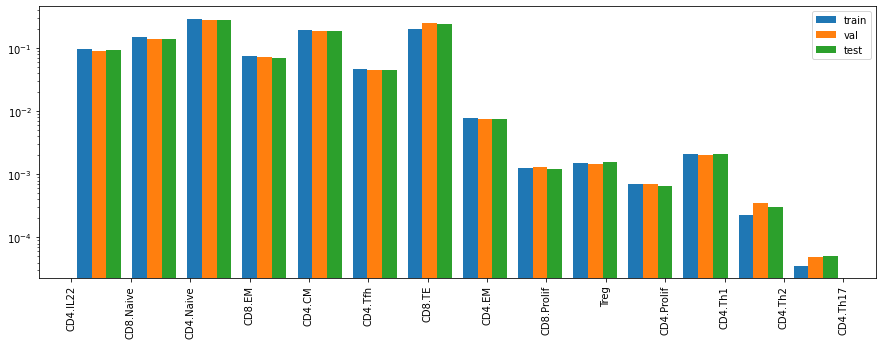

In [32]:
plt.figure(figsize=(15,5))
plt.hist([train['full_clustering'], val['full_clustering'], test['full_clustering']], density=True, bins=len(train['full_clustering'].unique()), label=['train', 'val', 'test'])
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')
plt.show()

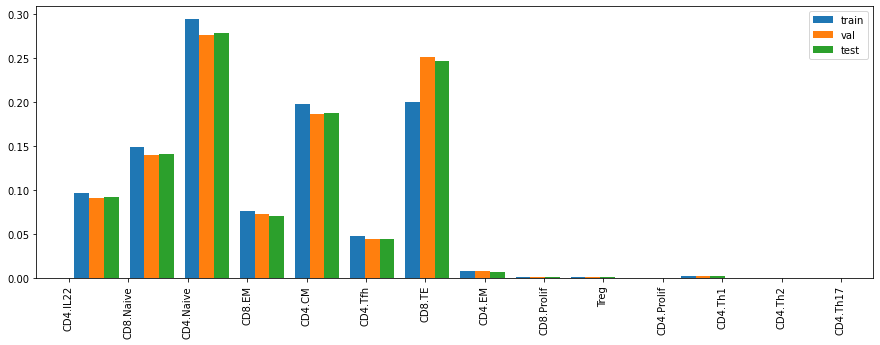

In [33]:
plt.figure(figsize=(15,5))
plt.hist([train['full_clustering'], val['full_clustering'], test['full_clustering']], density=True, bins=len(train['full_clustering'].unique()), label=['train', 'val', 'test'])
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')
plt.show()

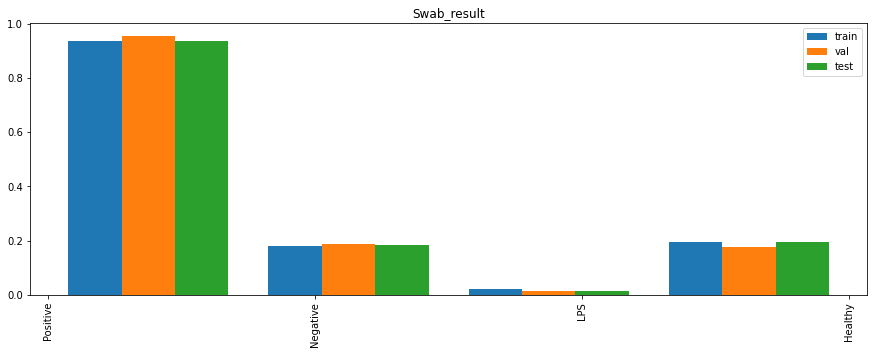

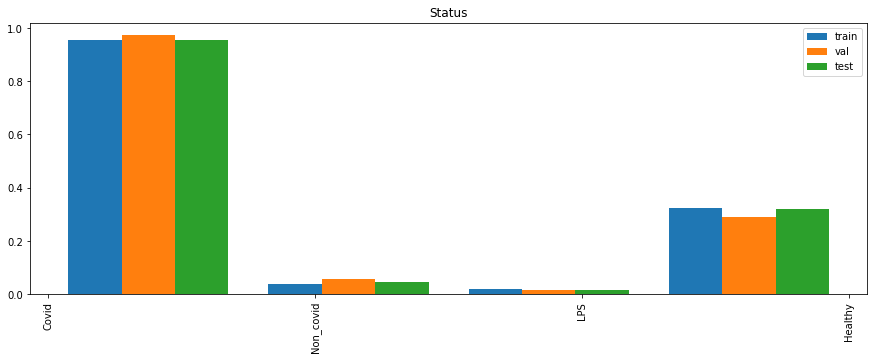

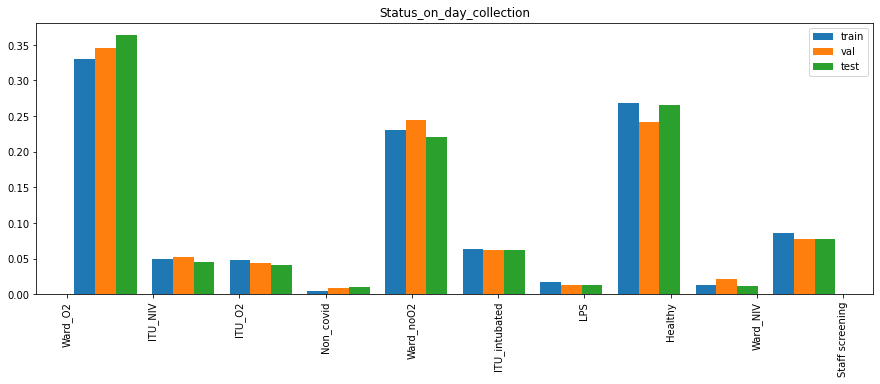

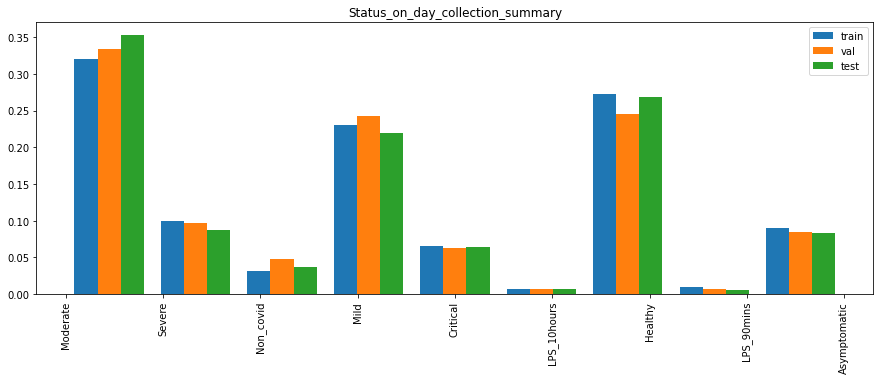

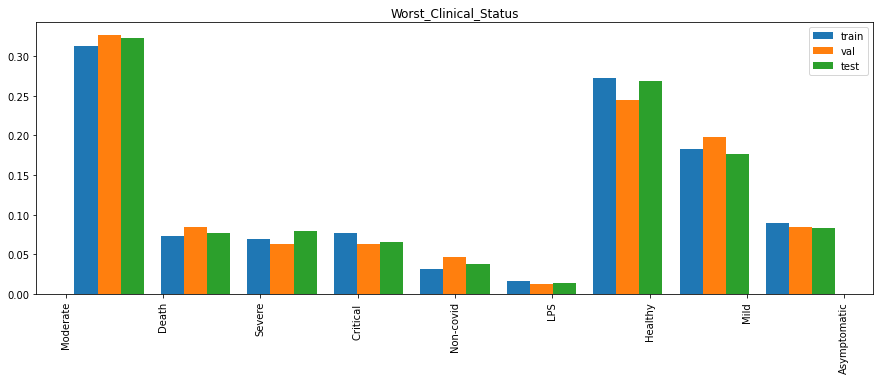

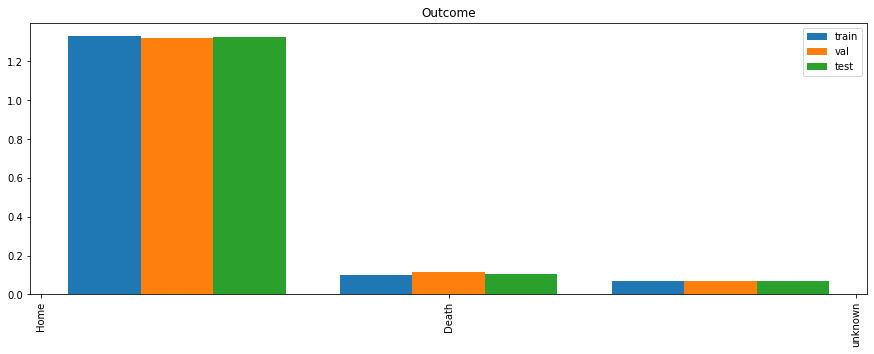

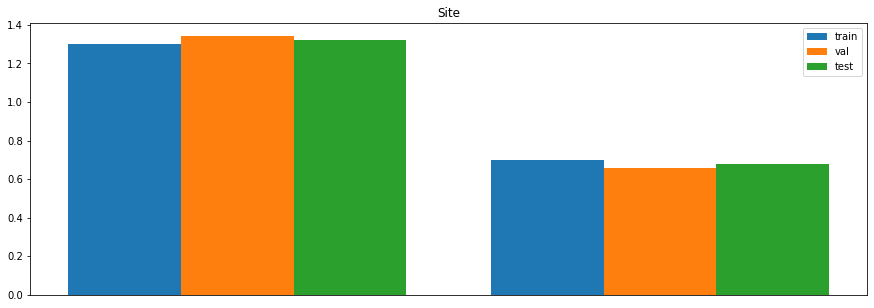

In [34]:
for column in ['Swab_result', 'Status', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Worst_Clinical_Status', 'Outcome', 'Site']:
    plt.figure(figsize=(15,5))
    plt.hist([train[column], val[column], test[column]], density=True, bins=len(train[column].unique()), label=['train', 'val', 'test'])
    plt.xticks(rotation='vertical')
    plt.legend(loc='upper right')
    plt.title(column)
    plt.show()

In [35]:
form_train = set(train['clonotype'].tolist())
form_val = set(val['clonotype'].tolist())
form_test = set(test['clonotype'].tolist())

print('Intersection in clonotypes between two sets should be empty\n')
print('Intersection in clonotypes between train and test: ', form_train.intersection(form_test))
print('Intersection in clonotypes between train and val: ', form_train.intersection(form_val))
print('Intersection in clonotypes between val and test: ', form_val.intersection(form_test))
# print('\nSanity Check - Intersection in clonotypes between train and train: ', form_train.intersection(form_train))

Intersection in clonotypes between two sets should be empty

Intersection in clonotypes between train and test:  set()
Intersection in clonotypes between train and val:  set()
Intersection in clonotypes between val and test:  set()


In [36]:
adata.obs.loc[train.index, 'set'] = 'train'
adata.obs.loc[val.index, 'set'] = 'val'
adata.obs.loc[test.index, 'set'] = 'test'
adata.obs['set'].value_counts()

train    60701
val      21596
test     21464
Name: set, dtype: int64

In [37]:
adata[adata.obs['set'] == 'train'].obs['full_clustering'].value_counts(normalize=True)

CD4.Naive     0.273406
CD8.TE        0.186422
CD4.CM        0.183803
CD8.Naive     0.138630
CD4.IL22      0.090246
CD8.EM        0.070559
CD4.Tfh       0.044316
CD4.EM        0.007216
CD4.Th1       0.001944
Treg          0.001400
CD8.Prolif    0.001153
CD4.Prolif    0.000659
CD4.Th2       0.000214
CD4.Th17      0.000033
Name: full_clustering, dtype: float64

In [38]:
adata[adata.obs['set'] == 'test'].obs['full_clustering'].value_counts(normalize=True)

CD4.Naive     0.258852
CD8.TE        0.229454
CD4.CM        0.174944
CD8.Naive     0.131383
CD4.IL22      0.085818
CD8.EM        0.065505
CD4.Tfh       0.041605
CD4.EM        0.006988
CD4.Th1       0.001957
Treg          0.001444
CD8.Prolif    0.001118
CD4.Prolif    0.000606
CD4.Th2       0.000280
CD4.Th17      0.000047
Name: full_clustering, dtype: float64

In [39]:
adata[adata.obs['set'] == 'val'].obs['full_clustering'].value_counts(normalize=True)

CD4.Naive     0.256899
CD8.TE        0.233145
CD4.CM        0.172995
CD8.Naive     0.130024
CD4.IL22      0.085201
CD8.EM        0.067744
CD4.Tfh       0.041443
CD4.EM        0.007085
CD4.Th1       0.001898
Treg          0.001343
CD8.Prolif    0.001204
CD4.Prolif    0.000648
CD4.Th2       0.000324
CD4.Th17      0.000046
Name: full_clustering, dtype: float64

# Add Conditional Variable

In [40]:
adata.obs[['patient_id', 'Sex', 'Site']]

,patient_id,Sex,Site
AAACCTGAGAAACCTA-MH9179824,MH9179824,Female,Ncl
AAACCTGAGAGTAATC-MH9179824,MH9179824,Female,Ncl
AAACCTGAGAGTGAGA-MH9179824,MH9179824,Female,Ncl
AAACCTGAGGAATCGC-MH9179824,MH9179824,Female,Ncl
AAACCTGAGTGTTGAA-MH9179824,MH9179824,Female,Ncl
...,...,...,...
BGCV13_TGTATTCGTCTAGCGC-1,CV0934,Female,Cambridge
BGCV13_TGTATTCTCGGAATCT-1,CV0934,Female,Cambridge
BGCV13_TGTCCCAAGTATTGGA-1,CV0934,Female,Cambridge
BGCV13_TGTCCCAGTACAAGTA-1,CV0934,Female,Cambridge


In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
enc = OneHotEncoder(sparse=False)
enc.fit(adata.obs['Site'].to_numpy().reshape(-1, 1))
adata.obsm['Site'] = enc.transform(adata.obs['Site'].to_numpy().reshape(-1, 1))
adata.uns['Site_enc'] = enc.categories_

In [43]:
adata.obsm['Site']

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [44]:
adata.uns['Site_enc']

[array(['Cambridge', 'Ncl'], dtype=object)]

In [45]:
enc = OneHotEncoder(sparse=False)
enc.fit(adata.obs['Sex'].to_numpy().reshape(-1, 1))
adata.obsm['Sex'] = enc.transform(adata.obs['Sex'].to_numpy().reshape(-1, 1))
adata.uns['Sex_enc'] = enc.categories_

In [46]:
enc = OneHotEncoder(sparse=False)
enc.fit(adata.obs['patient_id'].to_numpy().reshape(-1, 1))
adata.obsm['patient_id'] = enc.transform(adata.obs['patient_id'].to_numpy().reshape(-1, 1))
adata.uns['patient_id_enc'] = enc.categories_

In [47]:
print('Sum of each row: ', adata.obsm['patient_id'].sum(axis=1))
print('Shape: ', adata.obsm['patient_id'].shape)
adata.obsm['patient_id']

Sum of each row:  [1. 1. 1. ... 1. 1. 1.]
Shape:  (103761, 94)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Add Combined label 'Site' + 'Sex'

In [48]:
enc = OneHotEncoder(sparse=False)
adata.obs['Site+Sex'] = adata.obs['Site'].astype(str) + '_' + adata.obs['Sex'].astype(str)
enc.fit(adata.obs['Site+Sex'].to_numpy().reshape(-1, 1))
adata.obsm['Site+Sex'] = enc.transform(adata.obs['Site+Sex'].to_numpy().reshape(-1, 1))
adata.uns['Site+Sex_enc'] = enc.categories_

In [49]:
adata.obsm['Site+Sex']

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [50]:
adata.obs[['Site', 'Sex']]

,Site,Sex
AAACCTGAGAAACCTA-MH9179824,Ncl,Female
AAACCTGAGAGTAATC-MH9179824,Ncl,Female
AAACCTGAGAGTGAGA-MH9179824,Ncl,Female
AAACCTGAGGAATCGC-MH9179824,Ncl,Female
AAACCTGAGTGTTGAA-MH9179824,Ncl,Female
...,...,...
BGCV13_TGTATTCGTCTAGCGC-1,Cambridge,Female
BGCV13_TGTATTCTCGGAATCT-1,Cambridge,Female
BGCV13_TGTCCCAAGTATTGGA-1,Cambridge,Female
BGCV13_TGTCCCAGTACAAGTA-1,Cambridge,Female


In [51]:
adata.uns['Site+Sex_enc']

[array(['Cambridge_Female', 'Cambridge_Male', 'Ncl_Female', 'Ncl_Male'],
       dtype=object)]

In [52]:
adata.write_h5ad('../mvTCR/data/Haniffa/v3_conditional.h5ad', compression='gzip')

... storing 'TRA+TRB' as categorical
... storing 'set' as categorical
... storing 'Site+Sex' as categorical
